# Physical Model

We will set $\hbar=1$ for convenience. Also we will follow from here the notation from Python for matrices and arrays:

\begin{align}
\partial_{t}\left\langle \hat{\sigma}_{0}^{+}\right\rangle  & =-2{\rm i}\left(\overrightarrow{h_{0}}\cdot\left(\left\langle \hat{\sigma}_{0}^{z}\right\rangle ,{\rm i}\left\langle \hat{\sigma}_{0}^{z}\right\rangle ,-\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)-2\left(1+{\rm i}\right)\left(A_{10}+A_{01}\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left({\rm Re}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)+{\rm Im}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)+\left\langle \hat{\sigma}_{1}^{z}\right\rangle \right)\right)\\
 & \,\,\,\,\,\,-4\left(\gamma_{+}+\gamma_{-}+\gamma_{z}\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle +8\left(\gamma_{+}-\gamma_{-}\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{z}\right\rangle ,\\
\partial_{t}\left\langle \hat{\sigma}_{0}^{z}\right\rangle  & =\overrightarrow{h_{0}}\cdot\left({\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right),-{\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right),0\right)+\left({\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)-{\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)\right)\left(A_{10}+A_{01}\right)\left({\rm Re}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)+{\rm Im}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)+\left\langle \hat{\sigma}_{1}^{z}\right\rangle \right)\\
 & \,\,\,\,\,\,-8\left(\gamma_{+}+\gamma_{-}\right)\left\langle \hat{\sigma}_{0}^{z}\right\rangle +8\left(\gamma_{+}-\gamma_{-}\right)\left\langle \hat{\sigma}_{0}^{z}\right\rangle \left\langle \hat{\sigma}_{1}^{z}\right\rangle +6\left(\gamma_{+}-\gamma_{-}\right),\\
\partial_{t}\left\langle \hat{\sigma}_{1}^{+}\right\rangle  & =-2{\rm i}\left(\overrightarrow{h_{1}}\cdot\left(\left\langle \hat{\sigma}_{1}^{z}\right\rangle ,{\rm i}\left\langle \hat{\sigma}_{1}^{z}\right\rangle ,-\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)-2\left(1+{\rm i}\right)\left\langle \hat{\sigma}_{1}^{+}\right\rangle \left(A_{01}+A_{10}\right)\left({\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)+{\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)+\left\langle \hat{\sigma}_{0}^{z}\right\rangle \right)\right)\\
 & \,\,\,\,\,\,-4\left(\gamma_{+}+\gamma_{-}+\gamma_{z}\right)\left\langle \hat{\sigma}_{1}^{+}\right\rangle +8\left(\gamma_{+}-\gamma_{-}\right)\left\langle \hat{\sigma}_{1}^{+}\right\rangle \left\langle \hat{\sigma}_{0}^{z}\right\rangle ,\\
\partial_{t}\left\langle \hat{\sigma}_{1}^{z}\right\rangle  & =\overrightarrow{h_{1}}\cdot\left({\rm Im}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right),-{\rm Re}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right),0\right)+\left({\rm Im}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)-{\rm Re}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)\right)\left(A_{10}+A_{01}\right)\left({\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)+{\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)+\left\langle \hat{\sigma}_{0}^{z}\right\rangle \right)\\
 & \,\,\,\,\,\,-8\left(\gamma_{+}+\gamma_{-}\right)\left\langle \hat{\sigma}_{1}^{z}\right\rangle +8\left(\gamma_{+}-\gamma_{-}\right)\left\langle \hat{\sigma}_{1}^{z}\right\rangle \left\langle \hat{\sigma}_{0}^{z}\right\rangle +6\left(\gamma_{+}-\gamma_{-}\right).
\end{align}

# Complex ODEINT function

In [218]:
import numpy as np
from scipy.integrate import odeint


def odeintz(func, z0, t, **kwargs):
    """An odeint-like function for complex valued differential equations."""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

# Simulation

## Parameters

In [271]:
"""The user needs to set 2 parameters and the initial conditions of the system."""
"""In our case the parameters are the matrix h and the interaction matrix A."""

h=[[1, 1, 1],
   [1,-1,-2]]

h=np.array(h)

A=[[ 1, -2],
   [ 2, 1]]

A=np.array(A)

Dissipation_factor=0.3

Gamma=Dissipation_factor*np.array([0.2,0.1,0.4])  #[gamma+,gamma-,gammaz]


### Initial State

In [272]:
"""We consider by defect that the system starts in |0> for all the spins. The user can set the initial state as well."""
"""Recall that |0><0|=[[1,0],[0,0]]  """


def trace(A):
    return np.trace(A)

def matmu(A,B):
    return np.matmul(A,B)



rho_init1=np.array([[1,0],[0,0]])
rho_init2=np.array([[1,0],[0,0]])


sigma_p= np.array([[0,2],[0,0]])
sigma_z= np.array([[1,0],[0,-1]])


##Initial values

sp_init1=trace(matmu(rho_init1,sigma_p))
sz_init1=trace(matmu(rho_init1,sigma_z))
sp_init2=trace(matmu(rho_init2,sigma_p))
sz_init2=trace(matmu(rho_init2,sigma_z))


z0=np.array([sp_init1,sz_init1,sp_init2,sz_init2])


init_time=0
final_time=9
steps=10000

In [273]:
def cj(z): 
    return z.conjugate()

def real(z): 
    return z.real

def imag(z): 
    return z.imag


def dot_p(v1,v2):
    return np.dot(v1,v2)


if __name__ == "__main__":

    # Define the right-hand-side of the differential equation.
    def zfunc(z, t, K, L):
        p0, z0, p1, z1 = z
        
        g_plus0=[z0,1j*z0,-p0]
        g_z0=[imag(p0),-real(p0),0]
        g_plus1=[z1,1j*z1,-p1]
        g_z1=[imag(p1),-real(p1),0]
        
        
        
        dp0dt=-2j*( dot_p(h[0],g_plus0)-2*(1+1j)*(A[0][1]+A[1][0])*p0*(real(p1)+imag(p1)+z1) )-4*(np.sum(Gamma))*p0+8*(Gamma[0]-Gamma[1])*p0*z1
        dz0dt=dot_p(h[0],g_z0) +(imag(p0)-real(p0))*(A[0][1]+A[1][0])*( real(p1)+imag(p1)+z1 )-8*(Gamma[0]+Gamma[1])*z0+8*(Gamma[0]-Gamma[1])*z0*z1+6*(Gamma[0]-Gamma[1])  
        dp1dt=-2j*( dot_p(h[1],g_plus1)-2*(1+1j)*(A[0][1]+A[1][0])*p1*(real(p0)+imag(p0)+z0) )-4*(np.sum(Gamma))*p1+8*(Gamma[0]-Gamma[1])*p1*z0
        dz1dt=dot_p(h[1],g_z1)+(imag(p1)-real(p1))*(A[0][1]+A[1][0])*( real(p0)+imag(p0)+z0 )-8*(Gamma[0]+Gamma[1])*z1+8*(Gamma[0]-Gamma[1])*z0*z1+6*(Gamma[0]-Gamma[1])  
        
        
        return [dp0dt, dz0dt, dp1dt, dz1dt] 

    # Set up the inputs and call odeintz to solve the system.
    t = np.linspace(init_time, final_time, steps)
    K = 3
    L = 1
    z, infodict = odeintz(zfunc, z0, t, args=(K,L), full_output=True)

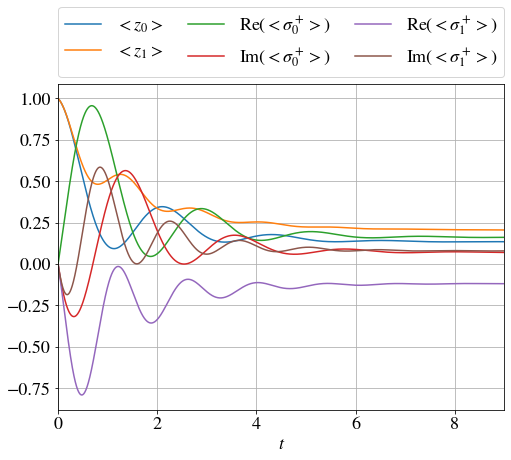

In [274]:
import matplotlib.pyplot as plt


import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

#plt.plot(t, z[:,0].imag, label='z1.imag')


plt.clf()
plt.plot(t,np.real(z[:,1]),label='$<z_0>$')
plt.plot(t,np.real(z[:,3]),label='$<z_1>$')
plt.plot(t,np.real(z[:,0]),label='Re$(<\sigma_0^+>)$')
plt.plot(t,np.imag(z[:,0]),label='Im$(<\sigma_0^+>)$')
plt.plot(t,np.real(z[:,2]),label='Re$(<\sigma_1^+>)$')
plt.plot(t,np.imag(z[:,2]),label='Im$(<\sigma_1^+>)$')
plt.xlabel('$t$')
plt.xlim(0,final_time)
plt.grid(True)
plt.legend(loc='lower right')
#plt.title("Evolution of Expected Values for N=2")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)

plt.show()